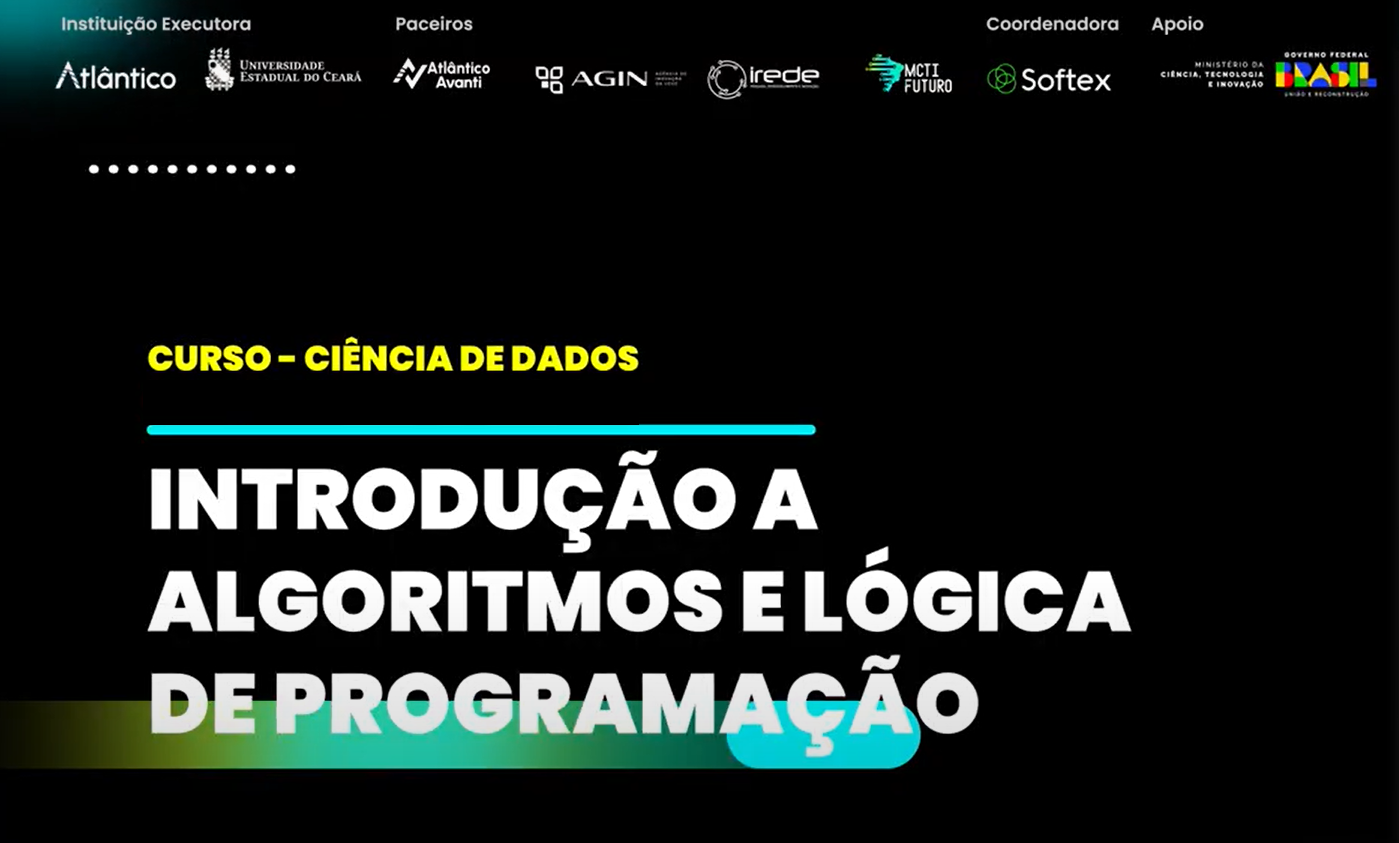

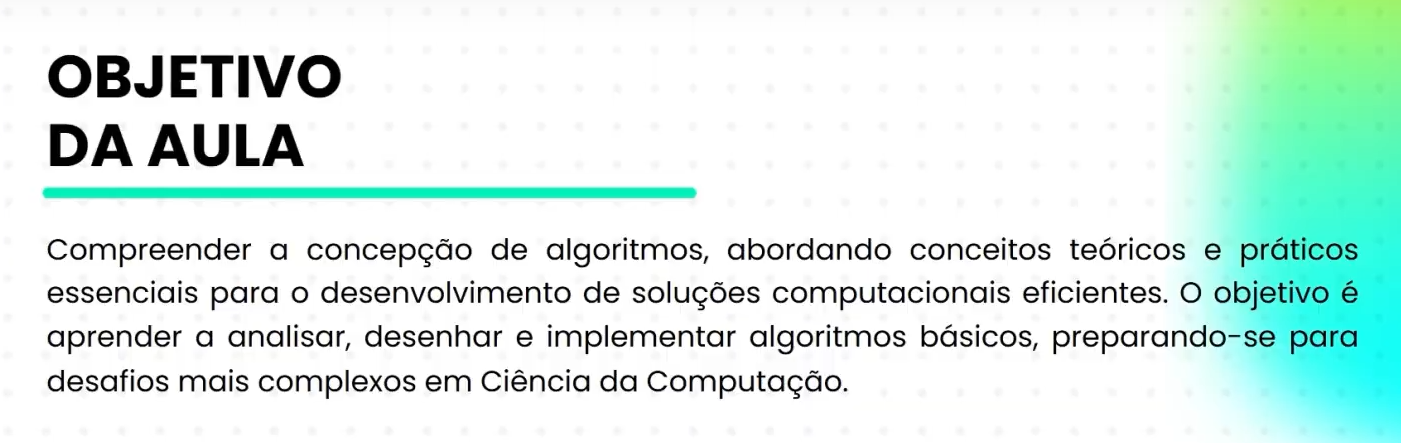

# Vamos considerar o exemplo da aula anterior como base para essa aula

# Considere um Problema
### Imagine que você precisa separar tipos de espécies de um flor.

Seu objetivo é : Prever a espécie de uma flor com base nas medidas das sépalas e pétalas.



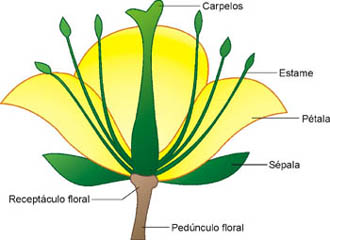

# Componentes da Ciência de Dados (Relembrando...)
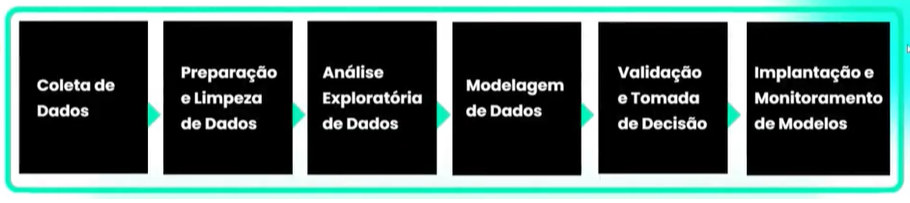

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_iris
import pandas as pd

# Carregar o dataset Iris
iris = load_iris()

# Criar um DataFrame com as características (features)
dados = pd.DataFrame(iris.data, columns=iris.feature_names)

# Adicionar a coluna alvo (target), que contém as classes das flores
dados['species'] = iris.target

# Exibir as primeiras linhas do DataFrame
dados.head()

## Agora vamos trabalhar a lógica de programação...

### 1. Estruturas Condicionais e Funções Simples

### Assumindo que recebeu uma classificação (Pequena, Média ou Grande) com os seguintes critérios em função do tamanho da pétala (petal length em cm):
- Pequena: se o tamanho da pétala for menor que 2.50cm
- Média: se o tamanho da pétala for menor que 5.00cm e maior ou igual que 2.50 cm
- Grande: se for maior ou igual á 5.00 cm
### Como podemos pensar na lógica para verificar o tamanho da pétala de uma flor e informar qual a sua classificação?


In [ ]:
petal_length = float(input("Digite o tamanho da pétala em cm: "))

if petal_length < 2.5:
    print('Classificação: Pequena')
elif 2.5 <= petal_length < 5.0:
    print('Classificação: Média')
else:
    print('Classificação: Grande')

### Como podemos codificar uma subrotina (função) que me permite apenas passar o valor do tamanho da pétala e obter essa classificação?

In [ ]:
# Função para classificar a flor com base no comprimento da pétala
def classify_by_petal_length(petal_length):

    if petal_length < 2.5:
        return 'Pequena'
    elif 2.5 <= petal_length < 5.0:
        return 'Média'
    else:
        return 'Grande'

### Modelo de utilização da subrotina (função)

In [ ]:
petal_length_value = 3.5
category = classify_by_petal_length(petal_length_value)
print(f"Categoria da flor: {category}")


### 2.Estruturas de Repetição (Loops)


## Vamos converter os dados iniciais do nosso dataset para uma estrutura mais familiar (sem bibliotecas): Uma matriz (Uma lista de Listas)

Uma matriz pode ser entendida como uma lista que contém listas. Na interpretação matemática, uma lista é um vetor e uma matriz é um conjunto de _n_ vetores representando uma matriz n-dimensional. A representação de uma matriz em python é dada da seguinte forma:

```bash
# matriz = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# matriz[[linha],[coluna]]
matriz = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(matriz[0][1])  # Resultado: 2 (linha 0, coluna 1)
```


In [ ]:

# Criar DataFrame do Pandas
df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
df['species'] = iris['target']

# Mapeamento das espécies para nomes das flores
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_mapping)

# Selecionar 4 flores da Setosa, 3 da Versicolor e 3 da Virginica para ter uma variação de classes
setosa_flowers = df[df['species'] == 'Setosa'].head(4)
versicolor_flowers = df[df['species'] == 'Versicolor'].head(3)
virginica_flowers = df[df['species'] == 'Virginica'].head(3)

# Concatenar os três subconjuntos para criar uma matriz com 10 elementos
flowers_matrix = pd.concat([setosa_flowers, versicolor_flowers, virginica_flowers]).values.tolist()

# A matriz
print(flowers_matrix)

### Como podemos desenvolver um código para deixar a apresentação da flowers_matrix parecida com dataframe "dados"?

In [ ]:
# Mostrar a matriz com um índice
count = 0
for flower in flowers_matrix:
    print(f"{count} {flower}")
    count= count+1

In [ ]:
# Usando while em vez do for
count = 0
while count < len(flowers_matrix):
    print(f"{count} {flowers_matrix[count]}")
    count = count + 1


### Como podemos contar quantas flores possui cada categoria (Pequena | Média | Grande)?

In [ ]:

qtdP = 0
qtdM = 0
qtdG = 0

# Analisando todas as flores da lista de flores
for flower in flowers_matrix:
    # O comprimento da pétala é o índice 2 de cada lista representando as informações de uma flor
    # sepal length (0)	sepal width (1)	petal length (2)	petal width (3)	species (4)
    petal_length = flower[2]
    # a categoria é identificada a partir da função
    category = classify_by_petal_length(petal_length)

    if  category == 'Pequena': # < 2.5
        qtdP = qtdP + 1

    elif category == 'Média': # 2.5 <= entre < 5.0:
        qtdM = qtdM + 1

    elif category == 'Grande': # >= 5.0
        qtdG = qtdG + 1
else:

    print(f"Pequena: {qtdP} | Média: {qtdM} | Grande: {qtdG}" )



### Como podemos criar uma função que encontre a flor com o menor e o maior comprimento de pétala no dataset.

##### Vamos adicionar um índice na lista de cada flor da nossa estrutura usando o método insert() do Python.

Funções/métodos básicos para listas em Python:

lista = ['maçã', 'banana', 'uva']

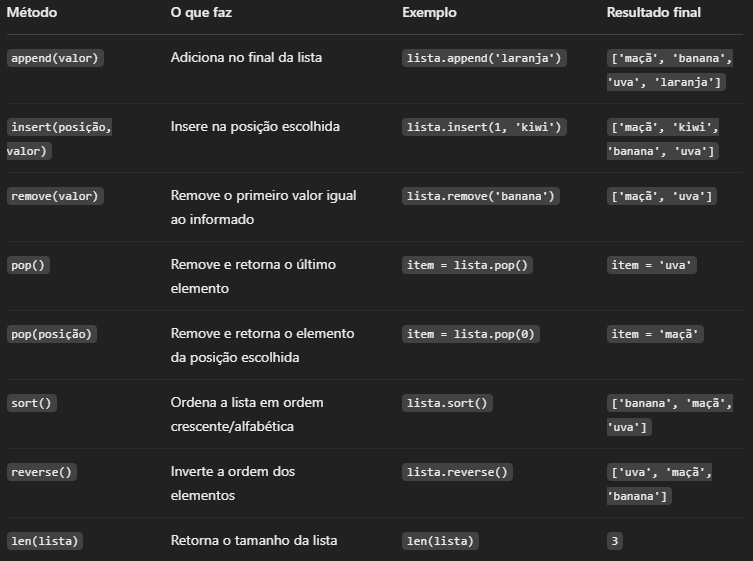

In [ ]:
count = 0
for flower in flowers_matrix:
    flower.insert(0,count)
    count+=1

print(flowers_matrix)

In [ ]:
# Mostrar a matriz com um índice
for flower in flowers_matrix:
    print(f"{flower}")


##### Agora podemos criar uma função que retorna qual o índice da flor com menor e o índice da flor com maior comprimento da pétala

In [ ]:
def find_min_max_petal_length(matrix):
    # A matriz contém informações das flores em listas:
    # id (0) sepal length (1) sepal width (2) petal length (3) petal width (4) species (5)

    # Inicializa os valores mínimo e máximo com o comprimento de pétala da primeira flor
    min_length = matrix[0][3]
    max_length = matrix[0][3]

    # Guarda os índices (posições) da flor com menor e maior comprimento
    index_min = 0
    index_max = 0

    # Variável para controlar em que linha (índice) estamos
    index = 0
    # Percorre todas as flores da matriz
    for flower in matrix:
        petal_length = flower[3] # Extrai o comprimento da pétala da flor atual

        if petal_length < min_length:
            min_length = petal_length
            index_min = index # Atualiza o índice da menor pétala

        if petal_length > max_length:
            max_length = petal_length
            index_max = index # Atualiza o índice da maior pétala

        index += 1 # Vai para a próxima linha

    return index_min,index_max


In [ ]:
id_min , id_max = find_min_max_petal_length(flowers_matrix)

print(f"Flor com menor comprimento de pétala: {flowers_matrix[id_min]}")
print(f"Flor com maior comprimento de pétala: {flowers_matrix[id_max]}")


### 3. Listas e Funções de Agregação


### Como podemos criar uma função que a média do comprimento das pétalas

In [ ]:
for row in flowers_matrix[:1]:
    print(row)


In [ ]:
def average_petal_length(matrix):
    # Usando uma lista compressão para extrair a coluna de índice 4
    # Uma maneira rápida e fácil de criar listas em Python, usando uma única linha de código.
    # A sintaxe de uma List Comprehension pode ser entendida como:
    #[<expressao> for item in list]  ou
    #[<expressao> for i in range(inicio, fim)]

    # row = [0, 5.1, 3.5, 1.4, 0.2, 'Setosa']

    column_4 = [row[3] for row in matrix]
    total_length = sum(column_4)
    print(column_4)
    return total_length / len(matrix)


    - expressao é qualquer sentença da linguagem que retorne um valor. Por exemplo, elevar ao quadrado retorna o resultado da potência;
    - item representa cada elemento da lista a ser formada/manipulada. A expressão precisa ser compatível com o elemento.
    - list é a lista a ser criada/manipulada. Por mais que a lista já exista, essa manipulação criará uma nova lista, pois estamos copiando a lista original e modificando cada elemento de acordo com a expressão;
    - i é o índice do for loop. O índice aumenta o valor em 1 a cada vez que a iteração acontece até chegar no valor final.

    No exemplo acima é equivalente a escrever:
    
    column_4 = []
    for row in matrix:
      column_4.append(row[3])



In [ ]:
avg_length = average_petal_length(flowers_matrix)
print(f"Média do comprimento das pétalas: {avg_length:.2f} cm")

### Como podemos adaptar essa funcão para calcular a média do comprimento das pétalas de cada tipo de flor (Setosa | Versicolor | Virginica)

In [ ]:
# Calcular a média por espécie
def average_petal_length_by_species(matrix, specie):
    species_lengths = [row[3] for row in matrix if row[5] == specie]
    return sum(species_lengths) / len(species_lengths)

In [ ]:
specie_0_avg = average_petal_length_by_species(flowers_matrix,'Setosa')  # Setosa
specie_1_avg = average_petal_length_by_species(flowers_matrix, 'Versicolor')  # Versicolor
specie_2_avg = average_petal_length_by_species(flowers_matrix, 'Virginica')  # Virginica

print(f"Média do comprimento das pétalas (Setosa): {specie_0_avg:.2f} cm")
print(f"Média do comprimento das pétalas (Versicolor): {specie_1_avg:.2f} cm")
print(f"Média do comprimento das pétalas (Virginica): {specie_2_avg:.2f} cm")

### 4. Aplicando Filtragem de Dados


### Como podemos filtrar e contar quantas flores da espécie 'Virginica' têm comprimento de pétala maior que 5.5 cm.

In [ ]:
#Algoritmo 1 - for para percorrer e if para filtrar

count = 0
for i in range(len(flowers_matrix)):
    if flowers_matrix[i][5] == 'Virginica' and flowers_matrix[i][3] > 5.5:
        count+=1

print(f"Flores Virginica com pétalas > 5 cm: {count}")


In [ ]:
#Algoritmo 2 - usando lista de compreensão

virginica_long_petal_count = [flowers_matrix[i]
                              for i in range(len(flowers_matrix)) if flowers_matrix[i][5] == 'Virginica'
                              and flowers_matrix[i][3] > 5.5]

print(f"Flores Virginica com pétalas > 5 cm: {len(virginica_long_petal_count)}")

### 5. Importância de utilizar bons algoritmos

A escolha de bons algoritmos é fundamental no desenvolvimento de soluções eficientes, especialmente quando se lida com grandes volumes de dados ou tarefas que exigem alto desempenho. Algoritmos bem projetados não apenas resolvem o problema corretamente, mas também o fazem de forma otimizada, economizando tempo de execução e recursos computacionais. Em muitos casos, a diferença entre um algoritmo eficiente e outro mal projetado pode significar minutos ou horas de processamento a mais. Além disso, algoritmos otimizados tornam o sistema mais escalável, permitindo lidar com maiores quantidades de dados sem comprometer a performance. Portanto, dominar e aplicar algoritmos adequados é essencial para garantir soluções eficazes, rápidas e sustentáveis em ciência de dados.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import time

# Carregar o dataset Iris e criar um DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['species'] = iris['target']

# Mapeamento das espécies para nomes das flores
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species'] = df['species'].map(species_mapping)

# Criar uma instância grande duplicando os dados do Iris várias vezes
large_data = pd.concat([df] * 1000, ignore_index=True)  # Multiplicando o dataset original 1000 vezes

# Converter para lista de listas
large_list = large_data.values.tolist()

# Função de busca linear (O(n))
def linear_search(data, target):
    for i, item in enumerate(data):
        if item[-1] == target:  # Buscando pela espécie
            return i
    return -1

# Função de busca binária (O(log n)), apenas funciona em dados ordenados
def binary_search(data, target):
    low, high = 0, len(data) - 1
    while low <= high:
        mid = (low + high) // 2
        if data[mid][-1] == target:
            return mid
        elif data[mid][-1] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Ordenar a lista por espécie para aplicar a busca binária
large_list.sort(key=lambda x: x[-1])

# Teste de desempenho com instância grande

# Medindo o tempo para a busca linear
start_time = time.time()
linear_result = linear_search(large_list, 'Virginica')
end_time = time.time()
print(f"Resultado da busca linear (índice encontrado): {linear_result}, Tempo de execução: {end_time - start_time:.6f} segundos")

# Medindo o tempo para a busca binária
start_time = time.time()
binary_result = binary_search(large_list, 'Virginica')
end_time = time.time()
print(f"Resultado da busca binária (índice encontrado): {binary_result}, Tempo de execução: {end_time - start_time:.6f} segundos")


- Linear Search	100000	Primeira ocorrência da espécie
- Binary Search	112499	Uma ocorrência qualquer (não necessariamente a primeira)

In [ ]:
print(df)
#print(large_data)
#print(large_list)

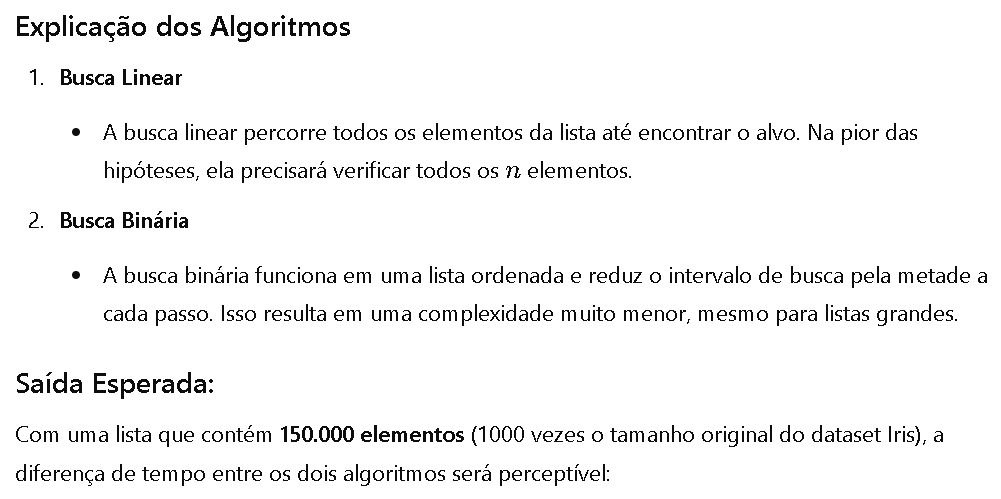

Resultado da busca linear (índice encontrado): 149999, Tempo de execução: 0.175432 segundos

Resultado da busca binária (índice encontrado): 149999, Tempo de execução: 0.000058 segundos